In [1]:
#Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [4]:
#Function to get every date from a range
def Print_every_day(start,end):
    date=[]

    month31=[1,3,5,7,8,10,12]
    month30=[4,6,9,11]

    year=int(start[:4])
    month=int(start[4:6])
    day=int(start[6:8])
    
    year_end=int(end[:4])
    moth_end=int(end[4:6])
    day_end=int(end[6:8])

    while (year<year_end) or (year==year_end and month<moth_end) or (year==year_end and month==moth_end and day<day_end):


        if year%4==0:#Check if it is a leap year

            if month<12:#Check if I'm at the end of the month

                if (month in month31): 
                    if day<31:
                        day+=1
                    else:
                        month+=1
                        day=1

                elif (month in month30): 
                    if day<30:
                        day+=1
                    else:
                        month+=1
                        day=1

                elif day<29: #February
                    day+=1
                else:
                    month+=1
                    day=1
            else:
                if day<31:
                    day+=1
                else:
                    year+=1
                    month=1
                    day=1
        else:
            if month<12:

                if (month in month31): 
                    if day<31:
                        day+=1
                    else:
                        month+=1
                        day=1

                elif (month in month30): 
                    if day<30:
                        day+=1
                    else:
                        month+=1
                        day=1

                elif day<28: 
                    day+=1
                else:
                    month+=1
                    day=1
            else:
                if day<31:
                    day+=1
                else:
                    year+=1
                    month=1
                    day=1


        if day<10: #Check if I need to add a 0 in front of the number
            day=str(day)
            day="0"+day
        else:
            day=str(day)

        if month<10: #Check if I need to add a 0 in front of the month
            month=str(month)
            month="0"+month
        else:
            month=str(month)
        
        year=str(year)

        date.append(year+month+day) #Add my date to the date list
        #Reconvert in int so that i can do operation on them
        year=int(year)
        month=int(month)
        day=int(day)
    
    return date

In [3]:
#Dates where Coinbase Has no Data
Empty_Data=['20131031', '20140107', '20140122', '20140329', '20141002', '20141212', '20150110', '20150228', '20150918', '20170710', '20210407', '20210408']

start="20130427" #start is not included, so i need to start a day before
end="20240719"
Date=Print_every_day(start,end)


for d in Date:
    try:
        Data_Extracted=pd.read_csv(f"Hystorical Data CoinMarketCap/{d}.csv")
        print(Data_Extracted.head())
    except:
        Empty_Data.append(d)
        Historical_Data_1w=pd.DataFrame({"Rank":[None],"Symbol":[None],"Market Cap":[None],"Volume":[None],"Price":[None],  
                                "Circulating":[None],"1h Variation":[None],"24h Variation":[None],"7d Variation":[None]})
        Historical_Data_1w.to_csv(f"Hystorical Data CoinMarketCap/{d}.csv") 

    


   Unnamed: 0  Rank Simbolo    Market Cap  Volume    Prezzo  \
0           0     1     BTC  1.488567e+09     NaN  134.2100   
1           1     2     LTC  7.463702e+07     NaN    4.3484   
2           2     3     PPC  7.250187e+06     NaN    0.3865   
3           3     4     NMC  5.995997e+06     NaN    1.1072   
4           4     5     TRC  1.503099e+06     NaN    0.6469   

   In Circolo (In valuta sua)  Variazione 1h  Variazione 24h  Variazione 7d  
0                  11091325.0           0.64             NaN            NaN  
1                  17164230.0           0.80             NaN            NaN  
2                  18757362.0          -0.93             NaN            NaN  
3                   5415300.0          -0.05             NaN            NaN  
4                   2323570.0           0.61             NaN            NaN  
   Unnamed: 0  Rank Simbolo    Market Cap  Volume    Prezzo  \
0           0     1     BTC  1.603769e+09     NaN  144.5400   
1           1     2     LTC

In [5]:

def Find_Unique_Crypto(start,end,Number_Of_Crypto):
    Date=Print_every_day(start,end)
    Crypto_ticket=pd.Series()
    for d in Date:
        Data_Extracted=pd.read_csv(f"Hystorical Data CoinMarketCap/{d}.csv").drop("Unnamed: 0",axis=1)
        Crypto_ticket=pd.concat([Crypto_ticket,Data_Extracted["Symbol"][:Number_Of_Crypto]],ignore_index=True)
        
    
    Crypto_ticket=list(set(Crypto_ticket)) #I make it a set so that it has only unique value, then i make it a list in case i need to do operations on it
    Crypto_ticket=pd.Series(Crypto_ticket)

    Crypto_ticket.drop(Crypto_ticket.index[pd.isna(Crypto_ticket)==True],inplace=True) #Delete nan values
    
    return Crypto_ticket

<font size=6>Here is where I actually calculate the Alt Season Index

<font size=4><b>The steps to follow are:</b>:
<font size=3>
    <ul>
        <li>Take the daily price data (and any other indicator I want to use) of the top 50/75/100/200 cryptocurrencies per MC cap and put them in a table, which has the date as indexes
        <li>Apply the pchange to the metrics I want, by default with a shift of 90 days (how long a season lasts), put this in a table
        <li>Take this last table and sort it in ascending order by pchange
        <li>See the position that BTC occupies, put it on a scale of 1 to 100, so if I have less than 100 crypto, I will have to readjust appropriately
        <li>Project the BTC position onto a chart, and see if you can use it as an indicator
    </ul>

</font>

Step One


In [6]:


Date=Print_every_day(start,end)
N_Crypto=50
Crypto_ticket=Find_Unique_Crypto(start,end,N_Crypto)#in this case i only want the top 50 crypto to be included in my ALT season calculation
Data_R=Date


Empty_Data=['20131031', '20140107', '20140122', '20140329', '20141002', '20141212', '20150110', '20150228', '20150918', '20170710', '20210407', '20210408']

try:
    for ed in Empty_Data:
        Data_R.remove(ed)
except:
    "" 




#Load the list of stable coin, and derivatived coin since i don't want them to be counted in my alt season index
Stable_Coin=pd.read_csv("Stable Coin and Asset Backed Token/Stable Coin List.csv").drop("Unnamed: 0",axis=1)
Asset_Backed_Crypto=pd.read_csv("Stable Coin and Asset Backed Token/Asset Backed Token List.csv").drop("Unnamed: 0",axis=1)



Historical_Data_Of_Interest=pd.DataFrame()
Metric="Price"#Metric i want to use in my alt season index



for t in Crypto_ticket:
    Data_Of_Interest=[]
    Break_out=False


    for d in Data_R:
        #if my ticket is in the asset backed token or stable coin list, then i exit the cycle and start with a new crypto
        if (Stable_Coin.index[Stable_Coin["0"]==t].size>0) or (Asset_Backed_Crypto.index[Asset_Backed_Crypto["0"]==t].size>0): 
            Break_out=True
            break
        
            
        Data_Extracted=pd.read_csv(f"Hystorical Data CoinMarketCap/{d}.csv").drop("Unnamed: 0",axis=1)


        if t in list(Data_Extracted["Symbol"]):
            ser=Data_Extracted[Metric].iloc[Data_Extracted.index[Data_Extracted["Symbol"]==t]]
            ser=float(ser.iloc[0])
            
            Data_Of_Interest.append(ser)
        else:
            Data_Of_Interest.append(None)
            
    
        
    #Concatenate the data
    if Break_out==False:
        Historical_Data_Of_Interest_Dummy=pd.DataFrame({t:Data_Of_Interest},index=Data_R)
        Historical_Data_Of_Interest=pd.concat([Historical_Data_Of_Interest,Historical_Data_Of_Interest_Dummy],axis=1)
    



20240724
['20130429', '20130430', '20130501', '20130502', '20130503', '20130504', '20130505', '20130506', '20130507', '20130508', '20130509', '20130510', '20130511', '20130512', '20130513', '20130514', '20130515', '20130516', '20130517', '20130518', '20130519', '20130520', '20130521', '20130522', '20130523', '20130524', '20130525', '20130526', '20130527', '20130528', '20130529', '20130530', '20130531', '20130601', '20130602', '20130603', '20130604', '20130605', '20130606', '20130607', '20130608', '20130609', '20130610', '20130611', '20130612', '20130613', '20130614', '20130615', '20130616', '20130617', '20130618', '20130619', '20130620', '20130621', '20130622', '20130623', '20130624', '20130625', '20130626', '20130627', '20130628', '20130629', '20130630', '20130701', '20130702', '20130703', '20130704', '20130705', '20130706', '20130707', '20130708', '20130709', '20130710', '20130711', '20130712', '20130713', '20130714', '20130715', '20130716', '20130717', '20130718', '20130719', '20130

'#Carico la lista delle Stable Coin e delle crypto derivate, in quanto non le devo considerare\nStable_Coin=pd.read_csv("Crypto Type List/Stable Coin List.csv").drop("Unnamed: 0",axis=1)\nAsset_Backed_Crypto=pd.read_csv("Crypto Type List/Asset Backed Token List.csv").drop("Unnamed: 0",axis=1)\n\n\n#Trovo tutte la varie crypto, ed il loro andamento nella metrica di interesse\nHistorical_Data_Of_Interest=pd.DataFrame()\nMetrica="Volume"\nN_Crypto=50\n\n\nfor t in Crypto_ticket:\n    Data_Of_Interest=[]\n    N_Crypto=50\n    Break_out=False\n\n    print(t)\n    \n\n    for d in Data_R:\n\n        if (Stable_Coin.index[Stable_Coin["0"]==t].size>0) or (Asset_Backed_Crypto.index[Asset_Backed_Crypto["0"]==t].size>0): #Se il mio ticket è presente nella lista delle Stable coin o delle Crypto Derivate allora esco dal ciclo e passo alla prossima crypto\n            Break_out=True\n            break\n        \n            \n        Data_Extracted=pd.read_csv(f"Dati Storici CoinMarketCap/{d}.csv").

In [ ]:
#Put inside a csv
Historical_Data_Of_Interest.to_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Metric}.csv")


Step Two

In [ ]:

shift=90#How much a season last, in days
Historical_Data_Of_Interest_pct_change=Historical_Data_Of_Interest.pct_change(periods=shift)*100
Historical_Data_Of_Interest_pct_change.to_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Metric}_pct_change.csv")


Step Three


In [9]:
#Create a table that for each days, orders the name of the cryptos in ascending order by the metric of interest
Stable_Coin=pd.read_csv("Stable Coin and Asset Backed Token/Stable Coin List.csv").drop("Unnamed: 0",axis=1)
Asset_Backed_Crypto=pd.read_csv("Stable Coin and Asset Backed Token/Asset Backed Token List.csv").drop("Unnamed: 0",axis=1)

Historical_Data_Of_Interest_ordered_Dummy=pd.read_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Metric}_pct_change.csv").drop("Unnamed: 0",axis=1)
Historical_Data_Of_Interest_ordered_Dummy.index=Data_R #Put the index name as the one of the Data


Historical_Data_Of_Interest_ordered_Ticket=pd.DataFrame()

for d in Data_R:

    
    Data_Extracted=pd.read_csv(f"Hystorical Data CoinMarketCap/{d}.csv").drop("Unnamed: 0",axis=1)

    Data_Extracted=Data_Extracted["Symbol"]
    Data_Extracted=[x for x in Data_Extracted.values if (x not in Stable_Coin.values and x not in Asset_Backed_Crypto.values)]
    
    Data_Extracted_TOP=Data_Extracted[:N_Crypto]
    
    H_I_D_O_I_key_sort_TOP=[]
    H_I_D_O_I_dict=Historical_Data_Of_Interest_ordered_Dummy.loc[d]
    H_I_D_O_I_dict=dict(H_I_D_O_I_dict) 
    
    H_I_D_O_I_keys=list(H_I_D_O_I_dict.keys())
    H_I_D_O_I_values=list(H_I_D_O_I_dict.values()) 



    
    
    
    H_I_D_O_I_value_index_ordered=np.argsort(H_I_D_O_I_values) #Order its value in ascending order
    H_I_D_O_I_dict_sort={H_I_D_O_I_keys[i]: H_I_D_O_I_values[i] for i in H_I_D_O_I_value_index_ordered} #Create a new ordered dictionary
    
    H_I_D_O_I_key_sort=list(H_I_D_O_I_dict_sort.keys())
    
    H_I_D_O_I_key_sort_TOP=[x for x in H_I_D_O_I_key_sort if x in Data_Extracted_TOP]

    #Concatenate the data
    Historical_Data_Of_Interest_ordered_Ticket_Dummy=pd.DataFrame(data=H_I_D_O_I_key_sort_TOP,columns=[d])
    Historical_Data_Of_Interest_ordered_Ticket=pd.concat([Historical_Data_Of_Interest_ordered_Ticket,Historical_Data_Of_Interest_ordered_Ticket_Dummy],axis=1)


          FST  SNGLS  MIOTA  WICC  GME       EGLD  GNT        GRT        ZEC  \
20130429  NaN    NaN    NaN   NaN  NaN        NaN  NaN        NaN        NaN   
20130430  NaN    NaN    NaN   NaN  NaN        NaN  NaN        NaN        NaN   
20130501  NaN    NaN    NaN   NaN  NaN        NaN  NaN        NaN        NaN   
20130502  NaN    NaN    NaN   NaN  NaN        NaN  NaN        NaN        NaN   
20130503  NaN    NaN    NaN   NaN  NaN        NaN  NaN        NaN        NaN   
...       ...    ...    ...   ...  ...        ...  ...        ...        ...   
20240720  0.0    0.0    0.0   0.0  0.0 -16.355248  0.0 -24.093817  30.559225   
20240721  0.0    0.0    0.0   0.0  0.0 -18.161634  0.0 -27.444481  31.496711   
20240722  0.0    0.0    0.0   0.0  0.0 -18.430034  0.0 -29.570259  26.805846   
20240723  0.0    0.0    0.0   0.0  0.0 -17.740385  0.0 -26.481481  29.938811   
20240724  0.0    0.0    0.0   0.0  0.0 -21.698553  0.0 -27.729831  28.583654   

          ICN  ...        ETC  SYNC  XD

KeyboardInterrupt: 

In [ ]:
#Put inside a csv
Historical_Data_Of_Interest_ordered_Ticket.to_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Metric}_pct_change_ordered_ticket.csv")

Step Quattro (partire da qui se si vuole fare l'indicatore anche per altre crypto)


In [19]:

#I load the data of the variation of tickets during time, and then i find the variation of the ticket i want
Price_or_Volume="Price"
H_D_O_I_final=pd.read_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Price_or_Volume}_pct_change_ordered_ticket.csv").drop("Unnamed: 0",axis=1)
Crypto_To_Compare="ETH"


value_altSeason=[]
Dummy_to_use={}
for d in H_D_O_I_final.columns:
    
    if len(H_D_O_I_final[d].index[H_D_O_I_final[d]==Crypto_To_Compare])!=0:#Make sure that in that day there actually is the ticket i'm searching
        value_altSeason.append(H_D_O_I_final[d].index[H_D_O_I_final[d]==Crypto_To_Compare][0])
        Dummy_to_use[d]=value_altSeason[-1]
    else:
        value_altSeason.append(None)
        Dummy_to_use[d]=value_altSeason[-1]
Dummy_to_use=pd.Series(Dummy_to_use)




#I put the value on a scale from 1 to 100
Alt_Season=Dummy_to_use*100/len(H_D_O_I_final)#This might not be the best method, but that's the one i'm using



#Since they are ordered in ascending order, if BTC has a higher return, it will be at the bottom, 
#since i want that when BTC is at the bottom it should be BCT season (so BTC is performing well)
Alt_Season=Alt_Season.apply(lambda x: mt.sqrt((float(x)-100)**2)) #A more mathematical method to get abs, instead of just using the function


#Put inside a csv
Alt_Season.to_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Crypto_To_Compare}_{Price_or_Volume}_Alt_Season.csv")

20240720    20.0
20240721    20.0
20240722    16.0
20240723    18.0
20240724    14.0
dtype: float64

Step Cinque

In [10]:
#Take all the data to plot them
Alt_Season_Index_Price=pd.read_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Crypto_To_Compare}_Price_Alt_Season.csv").drop("Unnamed: 0",axis=1)
Alt_Season_Index_Price=pd.Series(Alt_Season_Index_Price["0"])
Alt_Season_Index_Price.index=Data_R

Alt_Season_Index_Volume=pd.read_csv(f"Alt_Season_With_{N_Crypto}_Cryptos/{Crypto_To_Compare}_Volume_Alt_Season.csv").drop("Unnamed: 0",axis=1)
Alt_Season_Index_Volume=pd.Series(Alt_Season_Index_Volume["0"])
Alt_Season_Index_Volume.index=Data_R

Alt_Season_Diff=(Alt_Season_Index_Price-Alt_Season_Index_Volume)**2 #First step to make the difference
Alt_Season_Diff=Alt_Season_Diff.apply(lambda x: mt.sqrt(x))

448.54889336016095
16.222937625754525


16.222937625754525


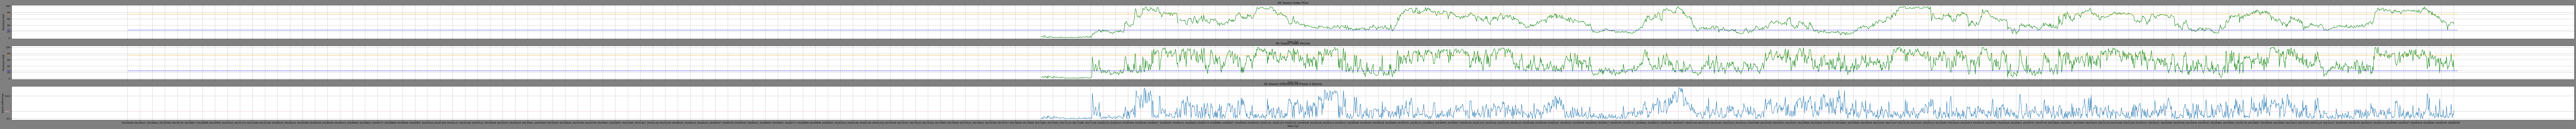

In [11]:
Alt_Season_Index_ToPrint=Alt_Season_Index_Price
Label=[]
for ind in range(0,len(Alt_Season_Index_ToPrint),22):
    Label.append(Alt_Season_Index_Price.index[ind])

Label.append(Alt_Season_Index_Price.index[-1])

Label_Restricted=Label[-20:]



yticks=[0,20,25,40,60,75,80,100]

fig,ax =plt.subplots(3,1,figsize=(200,9),sharex=True,facecolor="gray",dpi=200,sharey=False)


ax0=ax[0].plot(Alt_Season_Index_Price.index,Alt_Season_Index_Price,color="green")
ax[0].set(title="Alt Season Index Price",xlabel="Data (1g)",ylabel=f"Position {Crypto_To_Compare}")
ax[0].set_yticks(ticks=yticks)
ax[0].set_xticks(ticks=Label)
ax[0].get_yticklabels()[2].set_color("blue")
ax[0].get_yticklabels()[5].set_color("orange")
ax[0].hlines(y=75,color="orange",linestyles="dashed",xmin=1,xmax=4099)
ax[0].hlines(y=25,color="blue",linestyles="dashed",xmin=1,xmax=4099)
ax[0].grid()


ax1=ax[1].plot(Alt_Season_Index_Volume.index,Alt_Season_Index_Volume,color="green")
ax[1].set(title="Alt Season Index Volume",xlabel="Data (1g)",ylabel=f"Position {Crypto_To_Compare}")
ax[1].set_yticks(ticks=yticks)
ax[1].get_yticklabels()[2].set_color("blue")
ax[1].get_yticklabels()[5].set_color("orange")
ax[1].hlines(y=75,color="orange",linestyles="dashed",xmin=1,xmax=4099)
ax[1].hlines(y=25,color="blue",linestyles="dashed",xmin=1,xmax=4099)
ax[1].grid()

ax2=ax[2].plot(Alt_Season_Index_Volume.index,Alt_Season_Diff)
ax[2].set(title="Difference between Price and Volume Alt season",xlabel="Data (1g)",ylabel="Value of the Difference")
ax[2].set_yticks(ticks=[-50,0,Alt_Season_Diff.mean(),50])
ax[2].get_yticklabels()[2].set_color("pink")
ax[2].hlines(y=Alt_Season_Diff.mean(),color="pink",linestyle="dashed",xmin=1,xmax="4099")
ax[2].grid()

plt.show()